In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load Data
file_path = "EastWestAirlines.xlsx"  # Update path if needed
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="data")

In [4]:
# Drop ID column
df.drop(columns=["ID#"], inplace=True)

In [5]:
# Handle Outliers using IQR
def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

In [6]:
df = remove_outliers(df, df.columns)

In [7]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Award?"]))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [8]:
# --- K-MEANS CLUSTERING ---
# Finding optimal K using Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

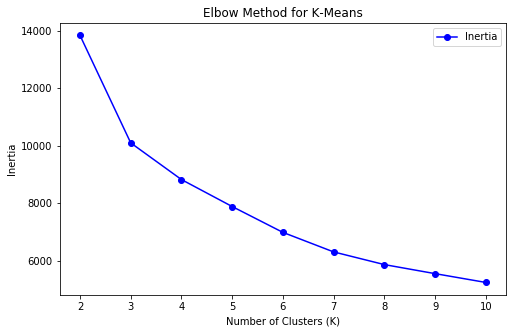

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', label="Inertia")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.legend()
plt.show()

In [10]:
# Apply K-Means with optimal K (Assume k=4 based on Elbow)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(scaled_df)

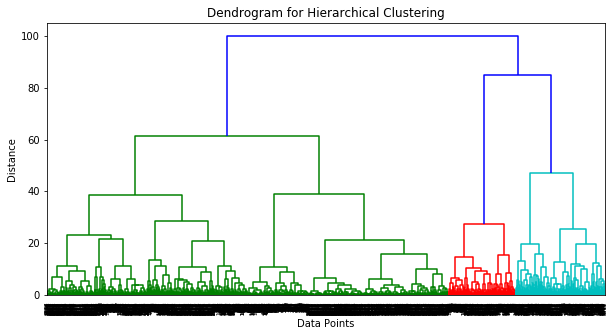

In [11]:
# --- HIERARCHICAL CLUSTERING ---
plt.figure(figsize=(10, 5))
dendrogram(linkage(scaled_df, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [12]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage="ward")
df["Hierarchical_Cluster"] = hierarchical.fit_predict(scaled_df)

# --- DBSCAN CLUSTERING ---
dbscan = DBSCAN(eps=1.5, min_samples=10)
df["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_df)

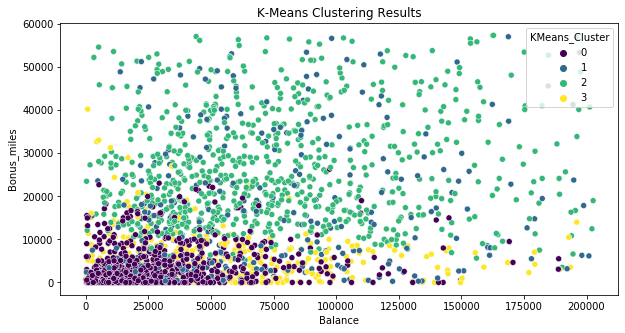

In [13]:
# --- CLUSTER VISUALIZATION ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Balance"], y=df["Bonus_miles"], hue=df["KMeans_Cluster"], palette="viridis")
plt.title("K-Means Clustering Results")
plt.show()

In [14]:
# Evaluate Clustering (Silhouette Score)
print(f"K-Means Silhouette Score: {silhouette_score(scaled_df, df['KMeans_Cluster'])}")
print(f"Hierarchical Silhouette Score: {silhouette_score(scaled_df, df['Hierarchical_Cluster'])}")
print(f"DBSCAN Silhouette Score: {silhouette_score(scaled_df, df['DBSCAN_Cluster'])}")


K-Means Silhouette Score: 0.27142910063303843
Hierarchical Silhouette Score: 0.23072656294038976
DBSCAN Silhouette Score: 0.31392420435725965


# From the results
DBSCAN performed the best with the highest Silhouette Score (0.3139), indicating better-defined clusters compared to K-Means (0.2717) and Hierarchical Clustering (0.2307).

DBSCAN is suitable for datasets with irregularly shaped clusters and noise.

K-Means works well for spherical clusters but struggles with complex shapes.

Hierarchical Clustering had the lowest score, suggesting it may not be the best fit for this dataset.

Overall, DBSCAN is the best choice for clustering this dataset, as it provides the most distinct and well-separated clusters.